# Vibrato Monte Carlo & Automatic differentiation

In [3]:
%reset -f
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
def savefig(filename):
    plt.savefig('outputs/{}.pdf'.format(filename))

In [5]:
# Figures configuration
width = 6
height = width / 1.618

preamble = r"\usepackage[utf8x]{inputenc}, \usepackage[T1]{fontenc}"
plt.rc('pgf', texsystem='pdflatex', preamble=preamble)
plt.rc('figure', figsize=[width, height], autolayout=True)
plt.rc('font', size=13, family='Serif')
plt.rc('text', usetex=True)
plt.rc('lines', linewidth=1.2)
plt.rc('axes.spines', top=False, right=False)
plt.rc('axes', labelsize=14, grid=False, titlesize=16, titlepad=22)
plt.rc('axes3d', grid=False)
plt.rc('xtick', direction='in', labelsize=14)
plt.rc('ytick', direction='in', labelsize=14)
plt.rc('xtick.minor', visible=True, size=4)
plt.rc('ytick.minor', visible=True, size=4)
plt.rc('xtick.major', size=7.5)
plt.rc('ytick.major', size=7.5)


# Speed test

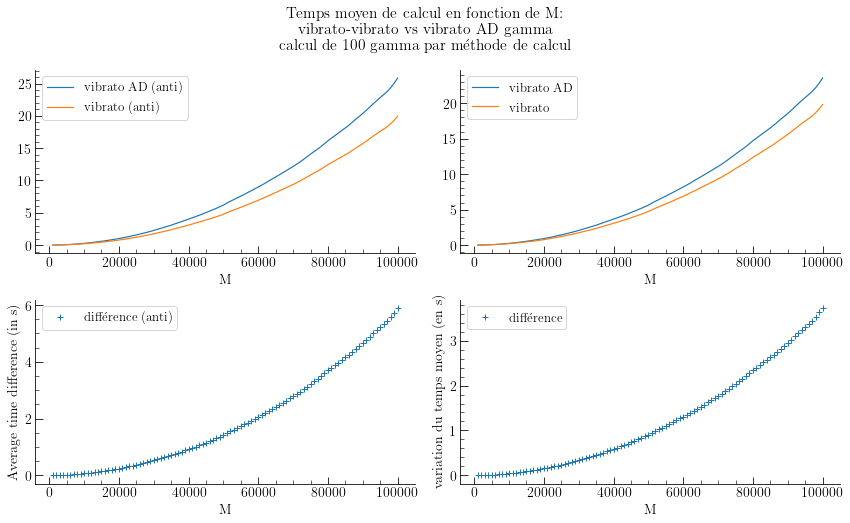

In [12]:
speed_gamma_vad = pd.read_csv('datasets/speed_gamma_vad.csv', 
                                            header=None, names=['M', 'vibrato AD'], 
                                            sep=';', index_col=0)
speed_gamma_vad_anti = pd.read_csv('datasets/speed_gamma_vad_anti.csv', 
                                            header=None, names=['M', 'vibrato AD (anti)'], 
                                            sep=';', index_col=0)
speed_gamma_vib = pd.read_csv('datasets/speed_gamma_vibrato.csv', 
                                            header=None, names=['M', 'vibrato'], 
                                            sep=';', index_col=0)
speed_gamma_vib_anti = pd.read_csv('datasets/speed_gamma_vibrato_anti.csv', 
                                            header=None, names=['M', 'vibrato (anti)'], 
                                            sep=';', index_col=0)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[12, 12/1.618])
fig.suptitle('Temps moyen de calcul en fonction de M:\nvibrato-vibrato vs vibrato AD gamma\n calcul de 100 gamma par méthode de calcul')
speed_gamma_vad_anti.plot(ax = ax1)
speed_gamma_vib_anti.plot(ax = ax1)
diff_anti = (speed_gamma_vad_anti['vibrato AD (anti)'] - speed_gamma_vib_anti['vibrato (anti)'])
diff_anti.plot(ax = ax3, ylabel= 'Average time difference (in s)', ls='', marker='+')
speed_gamma_vad.plot(ax = ax2)
speed_gamma_vib.plot(ax = ax2)
diff = (speed_gamma_vad['vibrato AD'] - speed_gamma_vib['vibrato'])
diff.plot(ax = ax4, ylabel= ' variation du temps moyen (en s)', ls='', marker='+')
ax4.legend(['différence']);
ax3.legend(['différence (anti)']);
savefig('speed')